# TASK 3 - CREDIT CARD FRAUD DETECTION

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline



In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [3]:
data = pd.read_csv('fraudTest.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Finding null values

In [5]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
#checking duplicate values

dup1 = data.duplicated().sum()
print("The total number of duplicated values in the dataset are: ", dup1)

The total number of duplicated values in the dataset are:  0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
enc=LabelEncoder()

In [9]:
data['trans_date_trans_time']=enc.fit_transform(data['trans_date_trans_time'])
data['merchant']=enc.fit_transform(data['merchant'])
data['category']=enc.fit_transform(data['category'])
data['first']=enc.fit_transform(data['first'])
data['last']=enc.fit_transform(data['last'])
data['gender']=enc.fit_transform(data['gender'])
data['street']=enc.fit_transform(data['street'])
data['state']=enc.fit_transform(data['state'])
data['city']=enc.fit_transform(data['city'])
data['job']=enc.fit_transform(data['job'])
data['dob']=enc.fit_transform(data['dob'])
data['trans_num']=enc.fit_transform(data['trans_num'])

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  int32  
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  int32  
 4   category               555719 non-null  int32  
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  int32  
 7   last                   555719 non-null  int32  
 8   gender                 555719 non-null  int32  
 9   street                 555719 non-null  int32  
 10  city                   555719 non-null  int32  
 11  state                  555719 non-null  int32  
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Describing the data

In [11]:
data.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,...,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,272908.154585,4.178387e+17,343.086430,6.237059,69.392810,173.152295,247.712797,0.451367,459.875509,...,38.543253,-90.231325,8.822189e+04,241.755040,494.567154,277859.000000,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,157507.512846,1.309837e+18,201.284993,3.912874,156.745941,95.372066,133.449728,0.497630,263.994300,...,5.061336,13.721780,3.003909e+05,136.327924,256.767245,160422.401459,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,0.000000,6.041621e+10,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,20.027100,-165.672300,2.300000e+01,0.000000,0.000000,0.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,136401.500000,1.800429e+14,166.000000,3.000000,9.630000,86.000000,138.000000,0.000000,237.000000,...,34.668900,-96.798000,7.410000e+02,124.000000,283.000000,138929.500000,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,273099.000000,3.521417e+15,346.000000,6.000000,47.290000,176.000000,251.000000,0.000000,457.000000,...,39.371600,-87.476900,2.408000e+03,239.000000,517.000000,277859.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,409786.500000,4.635331e+15,515.000000,10.000000,83.010000,248.000000,366.000000,1.000000,682.000000,...,41.894800,-80.175200,1.968500e+04,362.000000,710.000000,416788.500000,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,544759.000000,4.992346e+18,692.000000,13.000000,22768.110000,340.000000,470.000000,1.000000,923.000000,...,65.689900,-67.950300,2.906700e+06,477.000000,909.000000,555718.000000,1.388534e+09,66.679297,-66.952026,1.000000


# Shape

In [12]:
data.shape

(555719, 23)

In [13]:
data['city'].value_counts()

71     2423
475    2229
606    2222
782    2204
684    2182
       ... 
701      10
698       9
298       9
648       8
826       6
Name: city, Length: 849, dtype: int64

In [14]:
data['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [15]:
data['state'].value_counts()

42    40393
33    35918
37    34326
4     24135
34    20147
21    19671
13    18960
8     18104
1     17532
23    16501
22    13719
2     13484
26    12868
39    12541
16    12506
44    12506
47    12370
14    11959
11    11819
35    11379
9     11277
19    11152
48    10838
30    10528
28    10257
15     9943
17     8988
24     8833
49     8454
46     8116
36     7811
41     7359
31     7020
20     6928
27     6397
5      5886
40     5250
18     5186
25     5052
45     5044
43     4658
3      4592
29     3449
6      3277
12     2490
32     2451
7      1517
10     1090
0       843
38      195
Name: state, dtype: int64

In [16]:
data['street'].value_counts()

424    1474
658    1466
580    1462
601    1458
415    1428
       ... 
609       9
506       9
428       8
576       7
6         6
Name: street, Length: 924, dtype: int64

In [17]:
data['job'].value_counts()

186    4119
180    3968
425    3756
296    3750
114    3463
       ... 
177     195
152     194
307      11
411      11
167       8
Name: job, Length: 478, dtype: int64

# Correlation

In [18]:
data.corr()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.999998,-0.000823,-0.000832,0.001480,-0.001137,0.000940,0.001603,-0.000480,-0.000282,...,0.000336,-0.001558,-0.000794,0.000555,0.002661,0.001368,0.997054,0.000394,-0.001586,-0.013892
trans_date_trans_time,0.999998,1.000000,-0.000822,-0.000839,0.001470,-0.001132,0.000937,0.001605,-0.000482,-0.000284,...,0.000334,-0.001556,-0.000793,0.000558,0.002656,0.001367,0.997205,0.000393,-0.001583,-0.013864
cc_num,-0.000823,-0.000822,1.000000,0.001326,-0.001779,0.001963,-0.030216,0.007260,-0.001482,0.044153,...,-0.057512,-0.048783,-0.009414,0.031604,0.001627,-0.000125,-0.000810,-0.057183,-0.048818,-0.001540
merchant,-0.000832,-0.000839,0.001326,1.000000,0.028033,-0.003780,-0.001027,-0.000512,-0.002018,-0.000663,...,0.000455,0.000466,-0.000194,-0.000713,0.003128,-0.000028,-0.001017,0.000743,0.000395,-0.000086
category,0.001480,0.001470,-0.001779,0.028033,1.000000,0.026811,-0.002089,-0.002702,-0.027684,0.002538,...,-0.008215,-0.002902,0.009164,0.001794,0.002307,-0.001348,0.001097,-0.008180,-0.002967,0.016980
amt,-0.001137,-0.001132,0.001963,-0.003780,0.026811,1.000000,0.000584,-0.006236,0.000027,0.001114,...,0.002339,-0.002046,0.002760,-0.004848,0.013200,-0.002609,-0.000974,0.002404,-0.002053,0.182267
first,0.000940,0.000937,-0.030216,-0.001027,-0.002089,0.000584,1.000000,-0.058780,0.012469,-0.049143,...,0.130362,-0.014595,-0.067630,-0.040966,0.002872,-0.002572,0.000870,0.129213,-0.014627,-0.001725
last,0.001603,0.001605,0.007260,-0.000512,-0.002702,-0.006236,-0.058780,1.000000,0.042456,0.002867,...,-0.032045,-0.027565,-0.010603,-0.022202,-0.015990,-0.002153,0.001591,-0.031899,-0.027526,-0.001203
gender,-0.000480,-0.000482,-0.001482,-0.002018,-0.027684,0.000027,0.012469,0.042456,1.000000,0.041903,...,0.042692,0.051235,-0.029367,-0.079028,-0.012163,-0.000446,-0.000577,0.042569,0.051203,0.000748
street,-0.000282,-0.000284,0.044153,-0.000663,0.002538,0.001114,-0.049143,0.002867,0.041903,1.000000,...,-0.013773,0.073951,-0.011993,-0.014808,-0.044411,0.000099,-0.000331,-0.013682,0.073900,-0.001943


# Data Visualization

In [19]:
import plotly.express as px

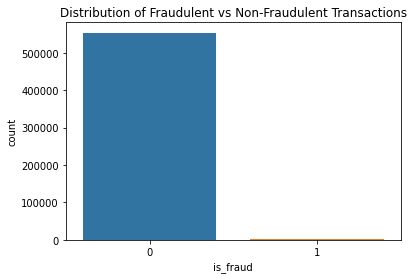

In [20]:
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

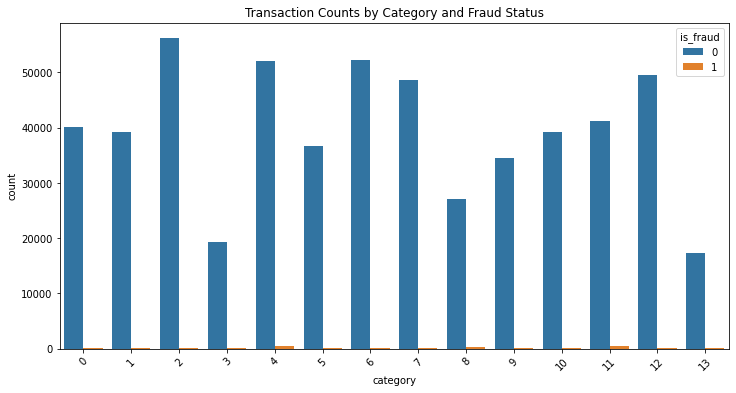

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=45)
plt.show()

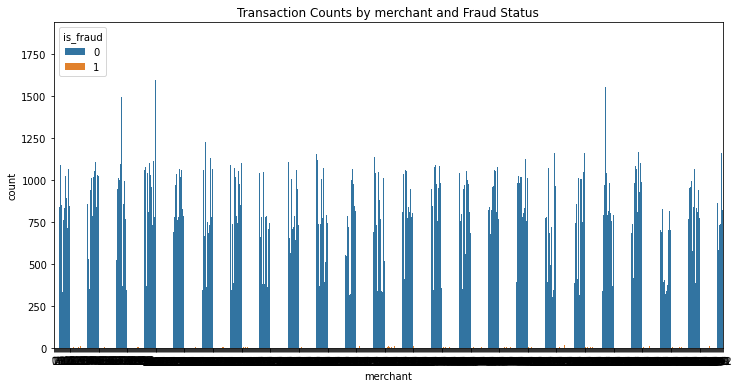

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='merchant', hue='is_fraud')
plt.title('Transaction Counts by merchant and Fraud Status')
plt.xticks(rotation=4)
plt.show()

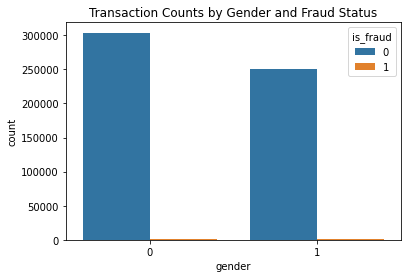

In [23]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

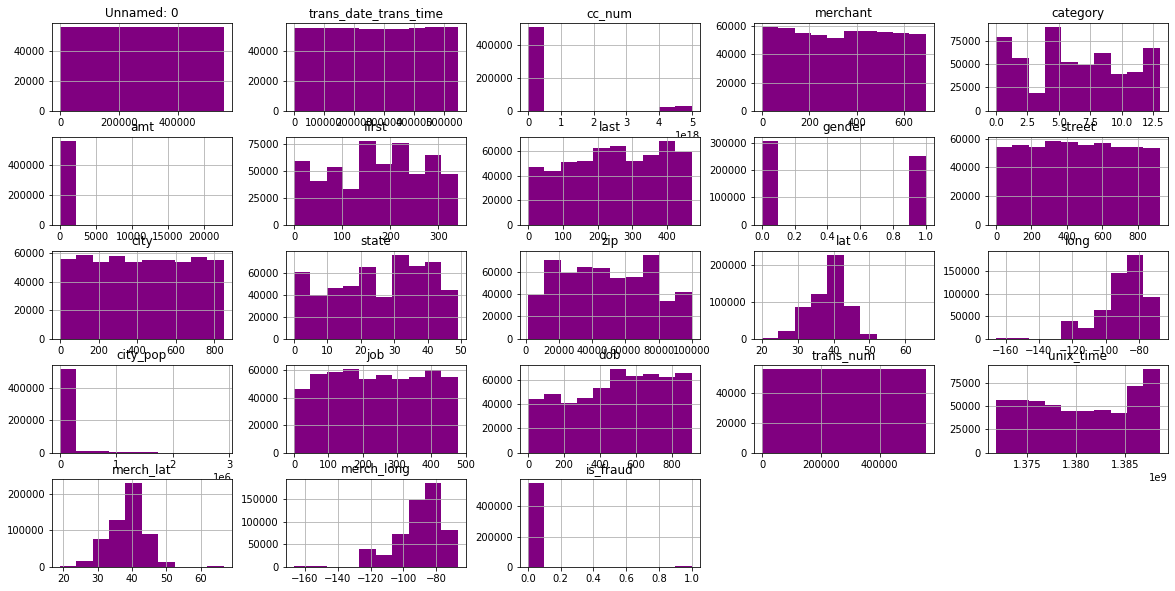

In [24]:
data.hist(figsize=(20,10),color='purple')
plt.show()

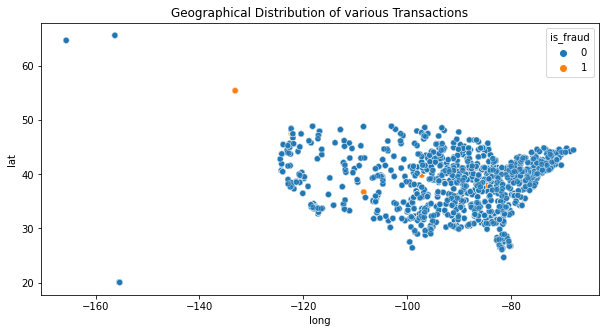

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=data, alpha=0.6, color='purple')
plt.title('Geographical Distribution of various Transactions')
plt.show()

# Heat Map

<AxesSubplot:>

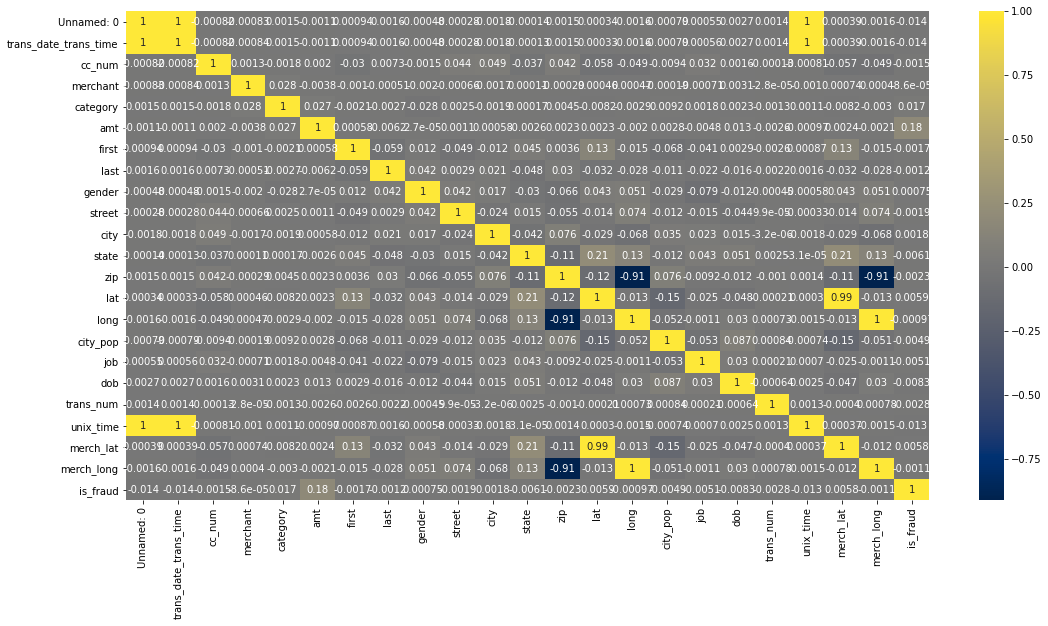

In [26]:
plt.figure(figsize=(18, 9))
sns.heatmap(data.corr(),annot=True,cmap='cividis')


# Data Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
X = data.drop(['is_fraud'], axis=1)
Y = data['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=20)

In [29]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (389003, 22)
x_test.shape: (166716, 22)
y_train.shape: (389003,)
y_test.shape: (166716,)


# Model Building

# Loading the models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [31]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")

# Evaluating each Models
names = []
accuracy = []
for name, model in models:
    
    # 10 Cross Fold Validation for each Models
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    # Displaying the Accuracy of each Model in Validation
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.996144
DTC: Accuracy = 0.996789
SVC: Accuracy = 0.996144


# Testing the models

In [32]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

# Creating function for model building

In [33]:
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(x_train, y_train)
    
    # Predicting the Values with Testing Set
    predictions = model.predict(x_test)
    
    # Model Testing Results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [34]:
# Predicting the Values
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)

----------------
Testing: LR
Accuracy: 0.9961311451810264
Confusion Matrix:
[[166071      0]
 [   645      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166071
           1       0.00      0.00      0.00       645

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

----------------
Testing: CART
Accuracy: 0.9970788646560618
Confusion Matrix:
[[165813    258]
 [   229    416]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166071
           1       0.62      0.64      0.63       645

    accuracy                           1.00    166716
   macro avg       0.81      0.82      0.81    166716
weighted avg       1.00      1.00      1.00    166716

----------------
Testing: SVC
Accuracy: 0.9961311451810264
Confusion Matrix:

# Model Saving

In [35]:
import pickle

In [36]:
for name, model in models:
    filename = name + ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")
     

Saved all Models
